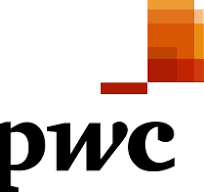

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import the data

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
churn_data = pd.read_excel('/content/drive/MyDrive/Data Analyst A - Z/Python/Projects/PwC-Churn-Dataset.xlsx')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


#2. Data preparation & Cleaning

In [69]:
#Check dataset overview
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
#Update data types
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors = 'coerce')

In [71]:
#Check 'SeniorCitizen' column
churn_data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [72]:
#Convert 'SeniorCitizen' to categorical values
churn_data['SeniorCitizen'] = churn_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
churn_data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [73]:
#Re-check data types of total charges column
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
#Check 'Churn' column
churn_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [75]:
#Convert 'Churn' column to numeric values
churn_data['Churn'] = churn_data['Churn'].apply(lambda x: 1 if x == "Yes" else 0)
churn_data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [76]:
#Finding missing values
churn_data.isnull().sum()    #11 rows missing data from 7043 rows dataset #too small propotion => drop

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [77]:
#Drop missing values
churn_data.dropna(inplace = True)

#Re-check the dataset
churn_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

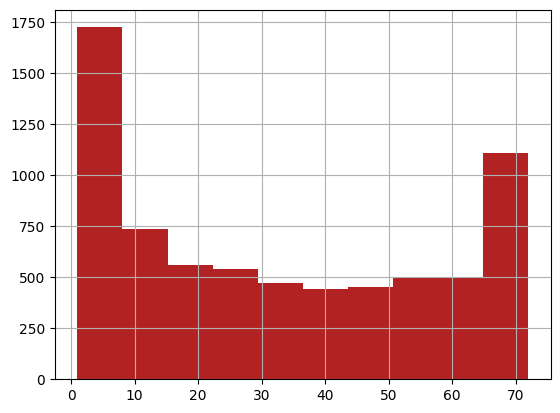

In [78]:
#Find outliers in 'tenure'
churn_data['tenure'].hist(color = 'firebrick')

<Axes: >

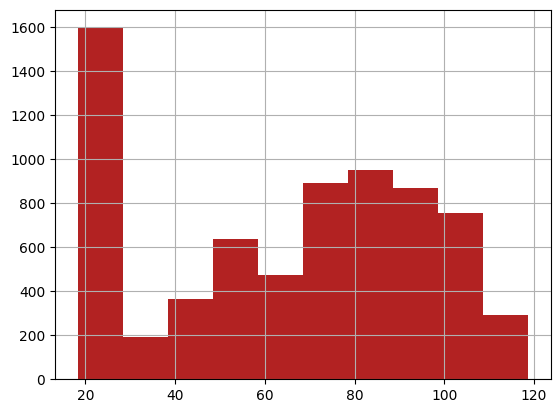

In [79]:
#Find outliers in 'MonthlyCharges'
churn_data['MonthlyCharges'].hist(color = 'firebrick')

<Axes: >

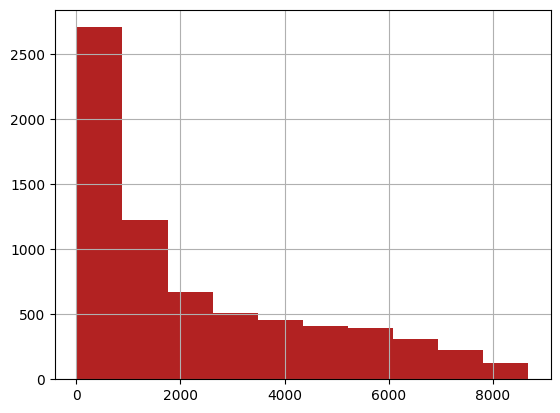

In [80]:
#Find outliers in 'TotalCharges'
churn_data['TotalCharges'].hist(color = 'firebrick')

<Axes: >

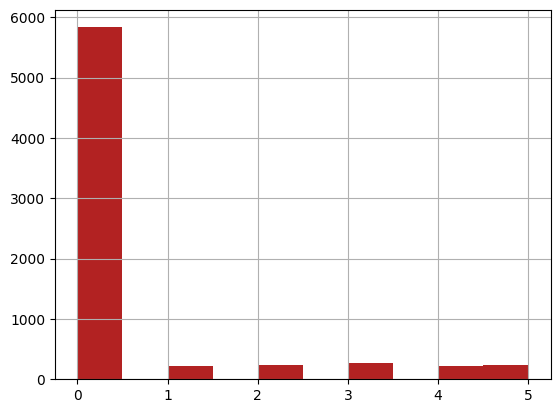

In [81]:
#Find outliers in 'numAdminTickets'
churn_data['numAdminTickets'].hist(color = 'firebrick')

In [82]:
churn_data['numAdminTickets'].value_counts().sort_index()

,count
numAdminTickets,
0,5834
1,222
2,243
3,262
4,228
5,243


<Axes: >

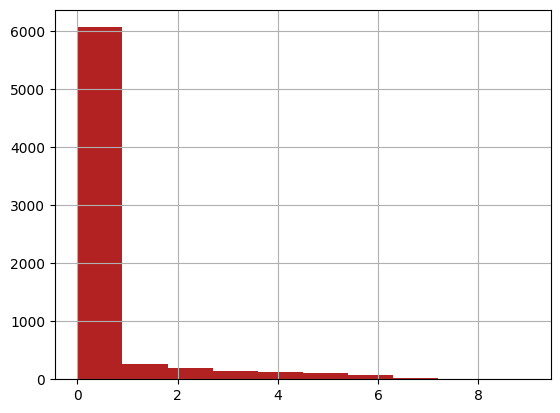

In [83]:
#Find outliers in 'numTechTickets'
churn_data['numTechTickets'].hist(color = 'firebrick')

In [84]:
#Find duplicates
churn_data.duplicated().sum()

np.int64(0)

In [85]:
#Double check doplicated data on 'customer ID' since it should be unique
churn_data['customerID'].value_counts().sort_values()

,count
customerID,
8191-XWSZG,1
9959-WOFKT,1
4190-MFLUW,1
4183-MYFRB,1
8779-QRDMV,1
...,...
7469-LKBCI,1
9763-GRSKD,1
6388-TABGU,1


# 3. Exploratory Data Analysis

In [86]:
#Check basis statistics
churn_data.describe()

,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785
std,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


<ipython-input-87-4a4f95b02668>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Churn', y = column, data = churn_data, palette = ['firebrick','darkorange'])
<ipython-input-87-4a4f95b02668>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Churn', y = column, data = churn_data, palette = ['firebrick','darkorange'])
<ipython-input-87-4a4f95b02668>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Churn', y = column, data = churn_data, palette = ['firebrick','darkorange'])
<ipython-input-87-4a4f95b02668>:8: FutureWarning: 

Passin

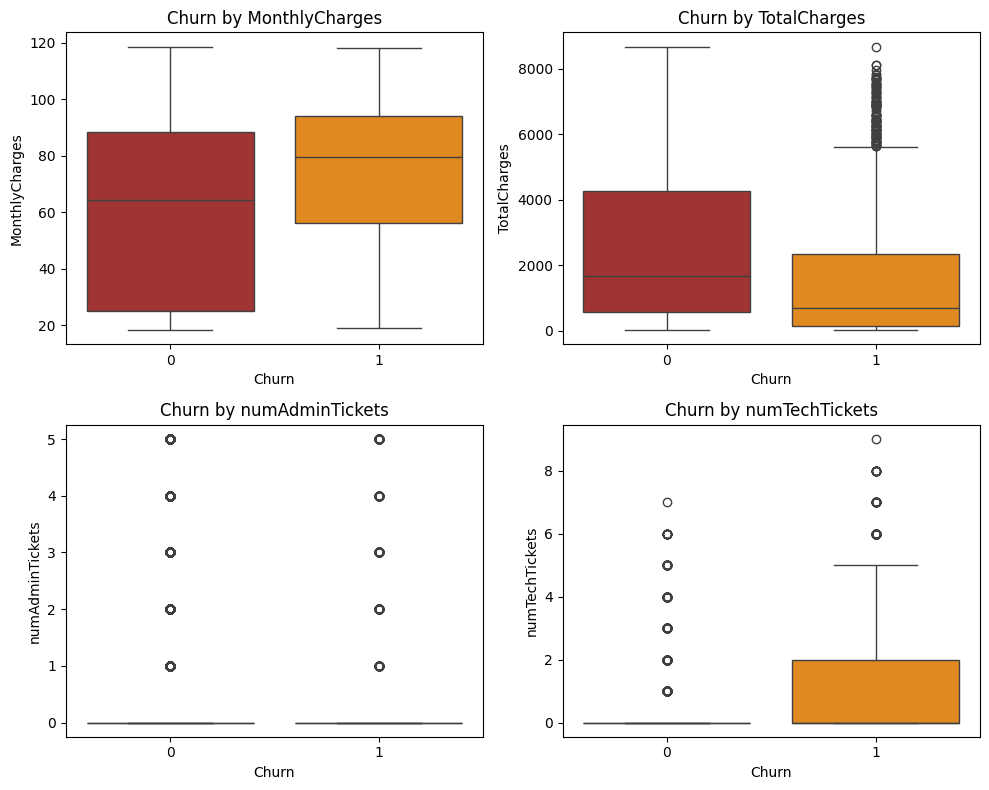

In [87]:
#Compare distributions in numerical variables
numerical_cols= ['MonthlyCharges','TotalCharges','numAdminTickets','numTechTickets']

#Display churn distribution for each numerical varibales
plt.figure(figsize = (10,8))
for i, column in enumerate(numerical_cols, 1):
  plt.subplot(2,2,i)
  sns.boxplot(x = 'Churn', y = column, data = churn_data, palette = ['firebrick','darkorange'])
  plt.title(f"Churn by {column}")
plt.tight_layout()
plt.show()

In [88]:
#Calculate the churn rate by numTechTickets
numTechTickets_churn = churn_data.groupby('numTechTickets')['Churn'].agg(['mean','count'])
numTechTickets_churn['churn_rate'] = numTechTickets_churn['mean']*100
numTechTickets_churn = numTechTickets_churn.sort_values('churn_rate', ascending = False)
numTechTickets_churn

,mean,count,churn_rate
numTechTickets,,,
9,1.000000,1,100.000000
8,1.000000,11,100.000000
7,0.965517,29,96.551724
6,0.819444,72,81.944444
5,0.750000,116,75.000000
4,0.691729,133,69.172932
3,0.668874,151,66.887417
1,0.656250,256,65.625000
2,0.626866,201,62.686567




*   Customers within higher monthly charge or lower total charge ranges demonstrate a greater tendency to churn.
*   Customers who submit a greater number of technical support tickets are more inclined to leave the service.

In [89]:
#Check frquency in categorical columns
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

#Display frequency counts for each categorical column
for col in categorical_cols:
  print(f"Frequency counts for {col}:")
  print(churn_data[col].value_counts())
  print("\n")

Frequency counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Frequency counts for SeniorCitizen:
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64


Frequency counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Frequency counts for OnlineBackup:
OnlineBackup
No         

# 4. Churn Analysis (Customer demographic analysis)

**--- Churn Percentage**

In [90]:
#Calculate overall churn rate
overall_churn_rate = churn_data['Churn'].mean() *100
print(f"Overall Churn Rate: {overall_churn_rate: .2f}%")

Overall Churn Rate:  26.58%


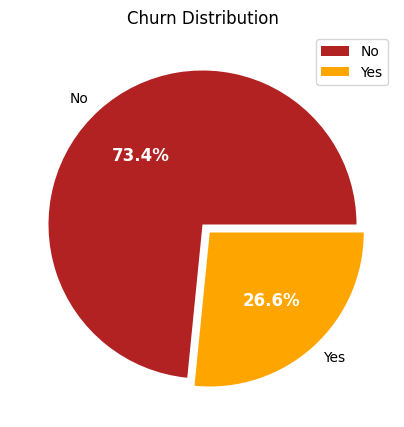

In [91]:
#Churn counts
churn_counts = churn_data['Churn'].value_counts()

#Define mapping
churn_labels = {0: "No", 1: "Yes"}

#Define explode (explode the "Yes" propotion)
explode = (0, 0.07)

#Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ["No", "Yes"]

#Plot the pie chart for churn distribution
plt.figure(figsize = (5, 5))
wedges, texts, autotexts = plt.pie(values, labels = labels, autopct = '%1.1f%%', colors = ['firebrick','orange'], explode = explode)

#Make the percentage labels stand out with font,style & color
plt.setp(autotexts, size = 12, weight = 'bold', color = 'white')
plt.legend()
plt.title("Churn Distribution")
plt.show()

**---Customer Segments**

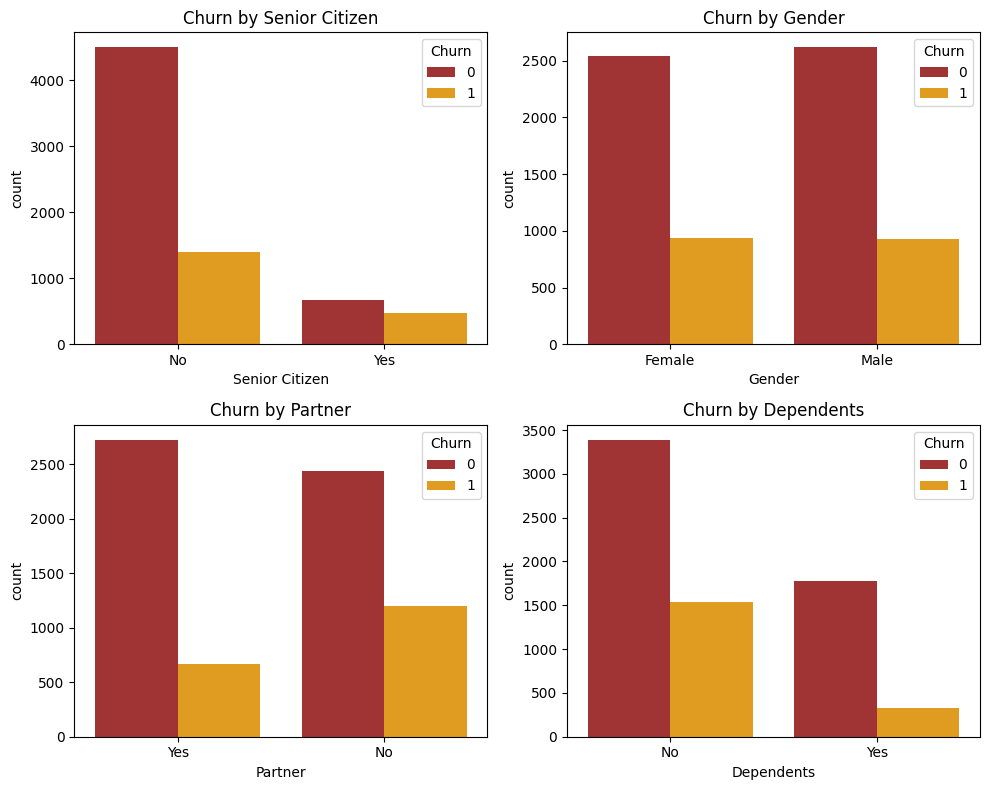

In [92]:
#Plot categorical relationships for overview
plt.figure(figsize=(10, 8))

#Display Churn by Age 'SeniorCitizen'
plt.subplot(2, 2, 1)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'])
plt.xlabel('Senior Citizen')
plt.title('Churn by Senior Citizen')

#Display Churn by Gender 'gender'
plt.subplot(2, 2, 2)
sns.countplot(x = 'gender', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'])
plt.xlabel('Gender')
plt.title('Churn by Gender')

#Display Churn by Partner
plt.subplot(2, 2, 3)
sns.countplot(x = 'Partner', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'])
plt.xlabel('Partner')
plt.title('Churn by Partner')

#Display Churn by Dependents
plt.subplot(2, 2, 4)
sns.countplot(x = 'Dependents', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'])
plt.xlabel('Dependents')
plt.title('Churn by Dependents')


plt.tight_layout()
plt.show()

In [93]:
#Calculate the churn rate by Senior Citizen
age_churn = churn_data.groupby('SeniorCitizen')['Churn'].agg(['mean','count'])
age_churn['churn_rate'] = age_churn['mean']*100
age_churn = age_churn.sort_values('churn_rate', ascending = False)
age_churn

,mean,count,churn_rate
SeniorCitizen,,,
Yes,0.416813,1142,41.681261
No,0.236503,5890,23.650255


In [94]:
#Calculate the churn rate by Gender
gender_churn = churn_data.groupby('gender')['Churn'].agg(['mean','count'])
gender_churn['churn_rate'] = gender_churn['mean']*100
gender_churn = gender_churn.sort_values('churn_rate', ascending = False)
gender_churn

,mean,count,churn_rate
gender,,,
Female,0.269595,3483,26.959518
Male,0.262046,3549,26.204565


In [95]:
#Calculate the churn rate by Partner
partner_churn = churn_data.groupby('Partner')['Churn'].agg(['mean','count'])
partner_churn['churn_rate'] = partner_churn['mean']*100
partner_churn = partner_churn.sort_values('churn_rate', ascending = False)
partner_churn

,mean,count,churn_rate
Partner,,,
No,0.329761,3639,32.976092
Yes,0.197171,3393,19.717065


In [96]:
#Calculate the churn rate by Dependents
dependents_churn = churn_data.groupby('Dependents')['Churn'].agg(['mean','count'])
dependents_churn['churn_rate'] = dependents_churn['mean']*100
dependents_churn = dependents_churn.sort_values('churn_rate', ascending = False)
dependents_churn

,mean,count,churn_rate
Dependents,,,
No,0.312791,4933,31.279140
Yes,0.155312,2099,15.531205


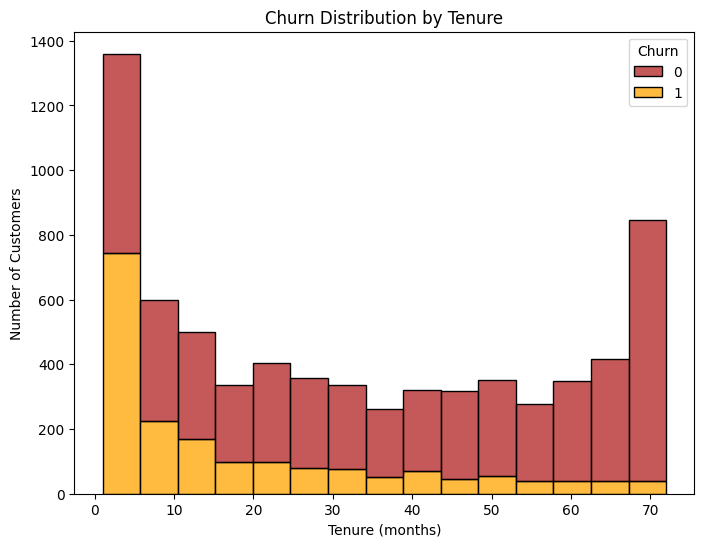

In [97]:
#Display Churn by Tenure 'tenure'
plt.figure(figsize=(8, 6))
sns.histplot(data=churn_data, x='tenure', hue='Churn', palette={0: 'firebrick', 1: 'orange'}, multiple='stack')
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

In [98]:
#Calculate the churn rate each tenure
tenure_churn = churn_data.groupby('tenure')['Churn'].agg(['mean','count'])
tenure_churn['churn_rate'] = tenure_churn['mean']*100
tenure_churn = tenure_churn.sort_values('churn_rate', ascending = False)
tenure_churn.head(10)

,mean,count,churn_rate
tenure,,,
1,0.619902,613,61.990212
2,0.516807,238,51.680672
5,0.481203,133,48.120301
4,0.471591,176,47.159091
3,0.470000,200,47.000000
7,0.389313,131,38.931298
10,0.387931,116,38.793103
9,0.386555,119,38.655462
15,0.373737,99,37.373737


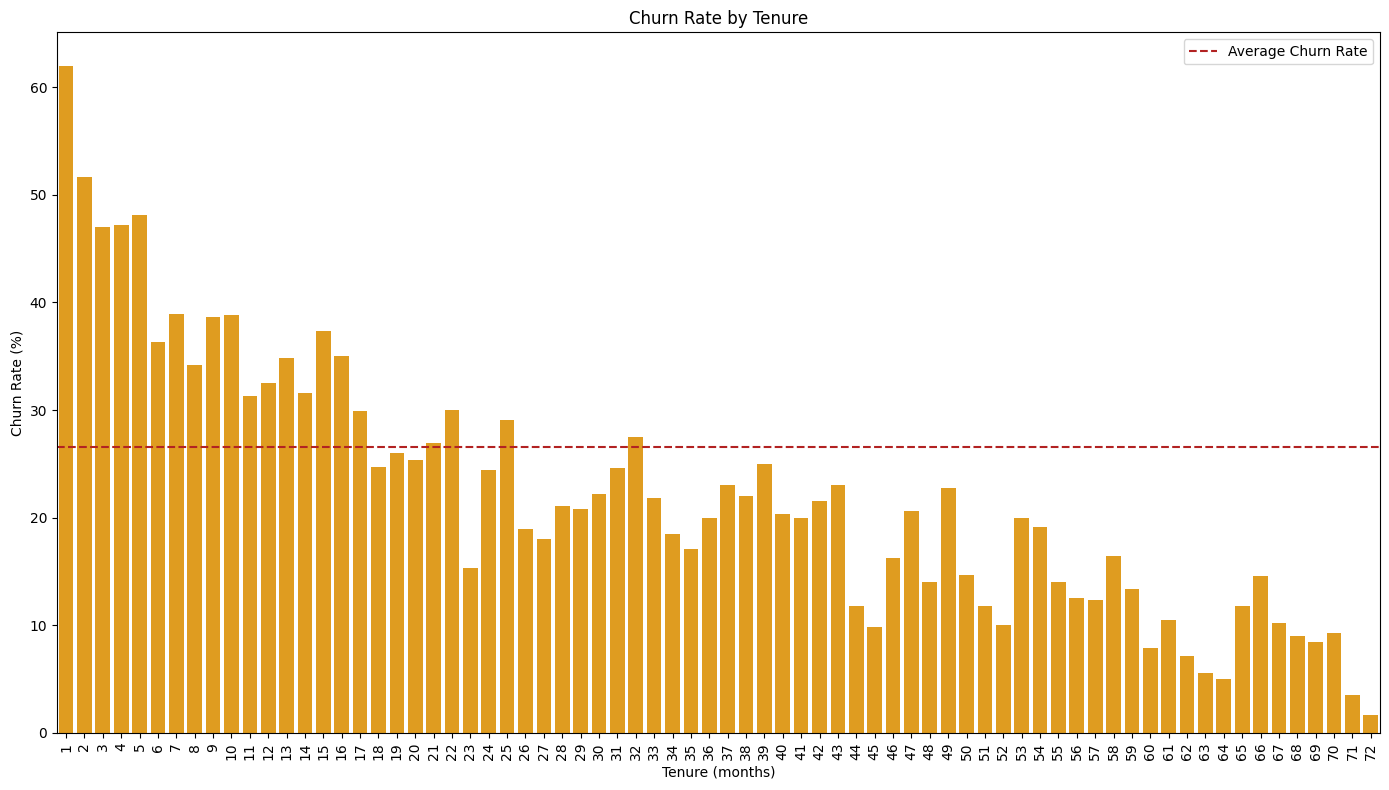

In [99]:
#Plot the churn rate by tenure
plt.figure(figsize=(14, 8))
sns.barplot(x = tenure_churn.index, y='churn_rate', data = tenure_churn, color = 'orange')
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure (months)')
plt.xticks(rotation=90)
plt.axhline(y = churn_data['Churn'].mean()*100, color = 'firebrick', linestyle = '--', label = 'Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
#Filter to tenures that have high churn rate ( > 30 %)
high_churn_tenures = tenure_churn[tenure_churn['churn_rate'] > 30]
high_churn_tenures.sort_index()

,mean,count,churn_rate
tenure,,,
1,0.619902,613,61.990212
2,0.516807,238,51.680672
3,0.470000,200,47.000000
4,0.471591,176,47.159091
5,0.481203,133,48.120301
6,0.363636,110,36.363636
7,0.389313,131,38.931298
8,0.341463,123,34.146341
9,0.386555,119,38.655462


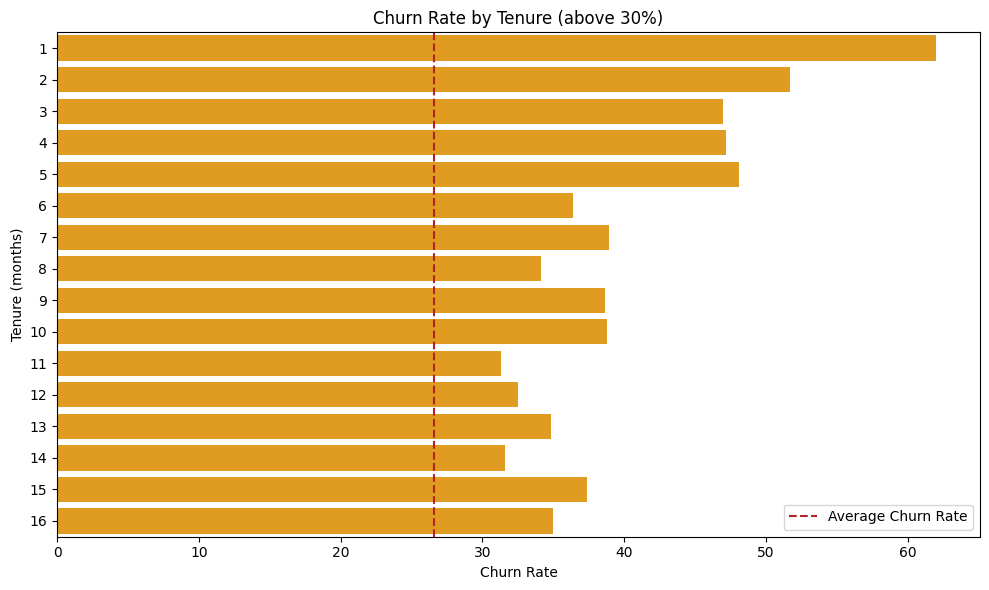

In [129]:
#Plot churn rate by tenure (above 30%)
plt.figure(figsize = (10, 6))
sns.barplot(y = high_churn_tenures.index, x = 'churn_rate', data = high_churn_tenures, orient='h', color = 'orange')
plt.title('Churn Rate by Tenure (above 30%)')
plt.xlabel('Churn Rate')
plt.ylabel('Tenure (months)')
plt.axvline(x = churn_data['Churn'].mean()*100, color = 'firebrick', linestyle = '--', label = 'Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

*   The churn rate represents over a quarter of the total customer base (26.6%).
*   Senior citizens constitute a small segment of the total customer base (16.24%), yet almost 50% of them discontinue their services.
*   The churn rate shows no notable difference between male and female customers. This suggests that gender does not have a considerable impact on the churn decision.
*   Customers without partners or dependents are more prone to cancel their services.
*   The highest churn rates are typically observed within the initial 16 months of customer tenure.

**---Services used**

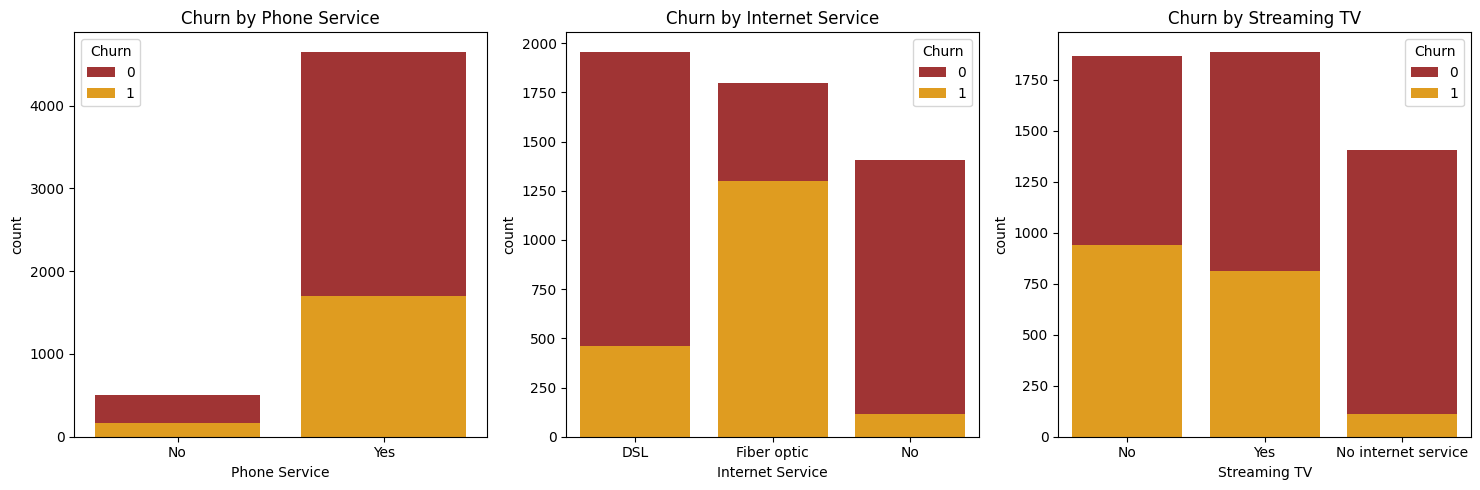

In [102]:
#Plot categorical relationships
plt.figure(figsize=(15, 5))

#Display Churn by Phone Service 'PhoneService'
plt.subplot(1, 3, 1)
sns.countplot(x = 'PhoneService', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'], dodge=False)
plt.xlabel('Phone Service')
plt.title('Churn by Phone Service')

#Display Churn by Internet Service 'InternetService'
plt.subplot(1, 3, 2)
sns.countplot(x = 'InternetService', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'], dodge=False)
plt.xlabel('Internet Service')
plt.title('Churn by Internet Service')

#Display Churn by Streaming TV 'StreamingTV'
plt.subplot(1, 3, 3)
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = churn_data, palette = ['firebrick','orange'], dodge=False)
plt.xlabel('Streaming TV')
plt.title('Churn by Streaming TV')


plt.tight_layout()
plt.show()

In [103]:
#Calculate the churn rate by Phone Service
phoneservice_churn = churn_data.groupby('PhoneService')['Churn'].agg(['mean','count'])
phoneservice_churn['churn_rate'] = phoneservice_churn['mean']*100
phoneservice_churn = phoneservice_churn.sort_values('churn_rate', ascending = False)
phoneservice_churn

,mean,count,churn_rate
PhoneService,,,
Yes,0.267475,6352,26.747481
No,0.250000,680,25.000000


In [104]:
#Calculate the churn rate by Internet Service
internetservice_churn = churn_data.groupby('InternetService')['Churn'].agg(['mean','count'])
internetservice_churn['churn_rate'] = internetservice_churn['mean']*100
internetservice_churn = internetservice_churn.sort_values('churn_rate', ascending = False)
internetservice_churn

,mean,count,churn_rate
InternetService,,,
Fiber optic,0.418928,3096,41.892765
DSL,0.189983,2416,18.998344
No,0.074342,1520,7.434211


In [105]:
#Calculate the churn rate by Streaming TV
tvservice_churn = churn_data.groupby('StreamingTV')['Churn'].agg(['mean','count'])
tvservice_churn['churn_rate'] = tvservice_churn['mean']*100
tvservice_churn = tvservice_churn.sort_values('churn_rate', ascending = False)
tvservice_churn

,mean,count,churn_rate
StreamingTV,,,
No,0.335351,2809,33.535066
Yes,0.301147,2703,30.114687
No internet service,0.074342,1520,7.434211


*   Around 1,700 customers with phone services have terminated their subscriptions. This represents nearly a quarter of the total customer base.
*   About 44% of customers have fiber optic internet service, yet nearly half of them subsequently discontinuing their service.
*   The churn rate shows minimal variation between customers with TV services and those without.

**--- Billing & Payment Methods**

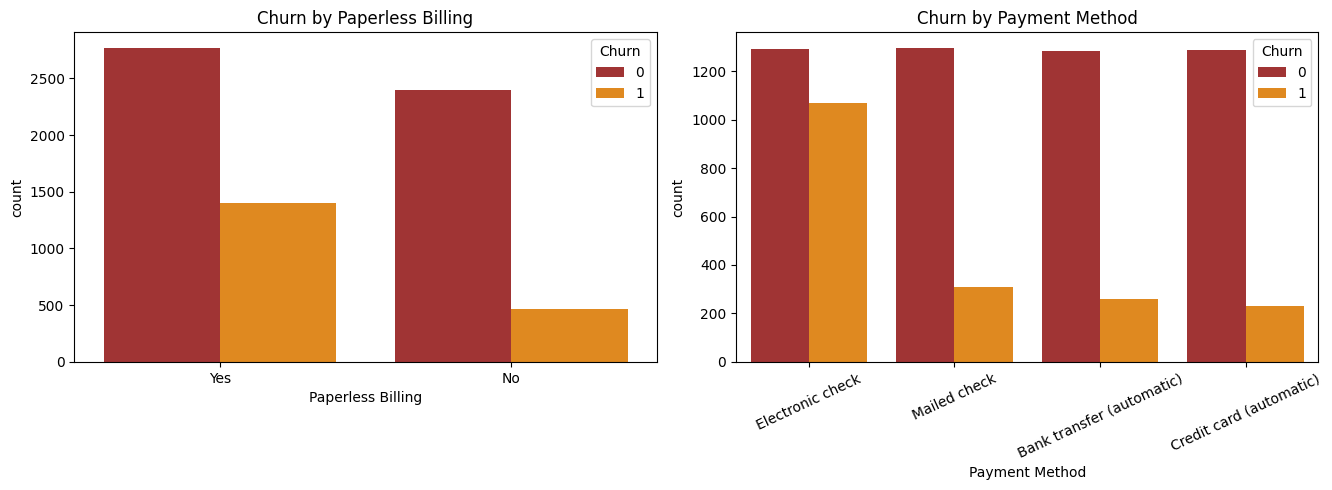

In [106]:
#Plot categorical relationships
plt.figure(figsize=(20, 5))

#Display Churn by Paperless Billing 'PaperlessBilling'
plt.subplot(1, 3, 1)
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = churn_data, palette = ['firebrick','darkorange'])
plt.xlabel('Paperless Billing')
plt.title('Churn by Paperless Billing')

#Display Churn by Payment Method 'PaymentMethod'
plt.subplot(1, 3, 2)
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = churn_data, palette = ['firebrick','darkorange'])
plt.xlabel('Payment Method')
plt.title('Churn by Payment Method')
plt.xticks(rotation = 25)

plt.tight_layout()
plt.show()

In [107]:
#Calculate the churn rate by Paperless Billing
paperlessbilling_churn = churn_data.groupby('PaperlessBilling')['Churn'].agg(['mean','count'])
paperlessbilling_churn['churn_rate'] = paperlessbilling_churn['mean']*100
paperlessbilling_churn = paperlessbilling_churn.sort_values('churn_rate', ascending = False)
paperlessbilling_churn

,mean,count,churn_rate
PaperlessBilling,,,
Yes,0.335893,4168,33.589251
No,0.163757,2864,16.375698


In [108]:
#Calculate the churn rate by Payment Method
paymentmethod_churn = churn_data.groupby('PaymentMethod')['Churn'].agg(['mean','count'])
paymentmethod_churn['churn_rate'] = paymentmethod_churn['mean']*100
paymentmethod_churn = paymentmethod_churn.sort_values('churn_rate', ascending = False)
paymentmethod_churn

,mean,count,churn_rate
PaymentMethod,,,
Electronic check,0.452854,2365,45.285412
Mailed check,0.192020,1604,19.201995
Bank transfer (automatic),0.167315,1542,16.731518
Credit card (automatic),0.152531,1521,15.253123




*   Almost 60% customers prefer paperless billing, and one-third of them end up canceling their services.
*   Approximately one-third of customers prefer electronic checks, with nearly 50% of them subsequently opting to churn.



**--- Contract Types**

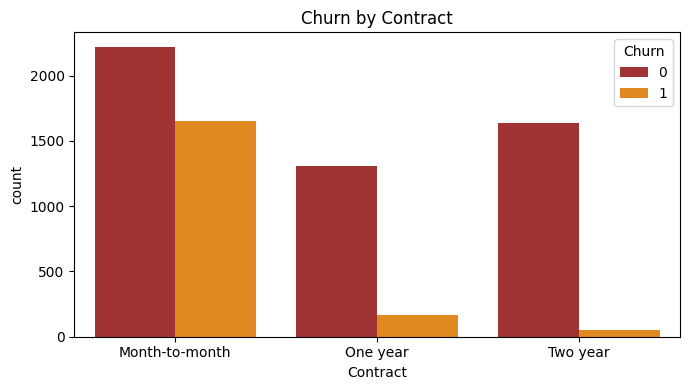

In [109]:
#Display Churn by Contract
plt.figure(figsize=(7, 4))
sns.countplot(x = 'Contract', hue = 'Churn', data = churn_data, palette = ['firebrick','darkorange'])
plt.xlabel('Contract')
plt.title('Churn by Contract')

plt.tight_layout()
plt.show()

In [110]:
#Calculate the churn rate by Contract
contract_churn = churn_data.groupby('Contract')['Churn'].agg(['mean','count'])
contract_churn['churn_rate'] = contract_churn['mean']*100
contract_churn = contract_churn.sort_values('churn_rate', ascending = False)
contract_churn

,mean,count,churn_rate
Contract,,,
Month-to-month,0.427097,3875,42.709677
One year,0.112772,1472,11.277174
Two year,0.028487,1685,2.848665


*   Nearly 50% customers who are on month-to-month basis tend to churn
*   As the contract duration increases, the likelihood of customer churn decreases.



**--- Feature correlations**



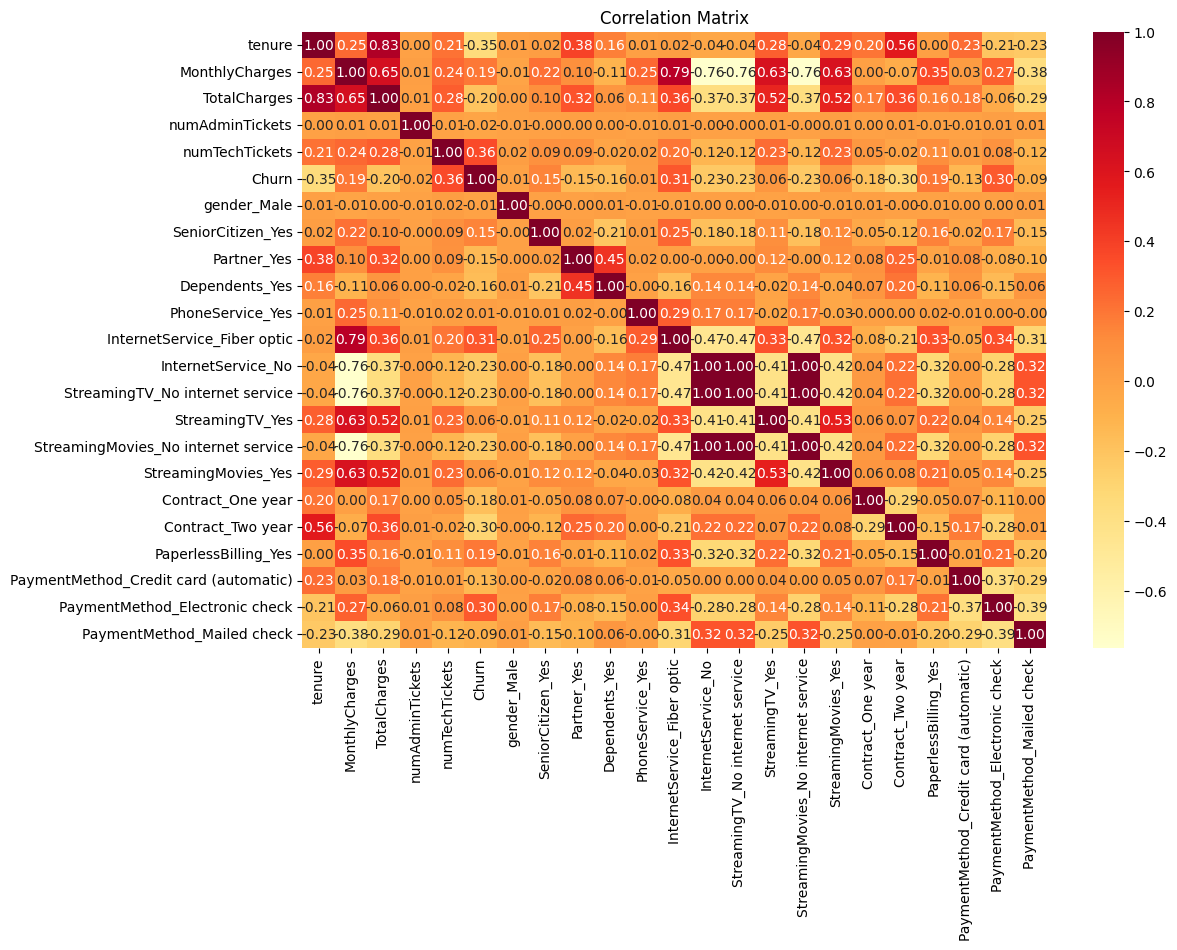

In [111]:
#Create a Correlation matrix
correlation = churn_data.drop(['customerID', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], axis = 1)
correlation = pd.get_dummies(correlation, drop_first = True)
plt.figure(figsize = (12, 8))
sns.heatmap(correlation.corr(), annot = True, cmap = 'YlOrRd', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

# 5. Feature Engineering

### 5.1. Data Encoding

In [112]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [113]:
#Convert object columns to lowercase
for column in ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']:
    churn_data[column] = churn_data[column].str.lower()

churn_data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,female,no,yes,no,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check
1,male,no,no,no,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check
2,male,no,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check
3,male,no,no,no,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic)
4,female,no,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,no,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check
7039,female,no,yes,yes,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card (automatic)
7040,female,no,yes,yes,no,no phone service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic check
7041,male,yes,yes,no,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check


In [114]:
#Define a label encoding function to change all yes no columns to numeric
def encode(column):
  return column.map({'yes': 1, 'no': 0, 'no phone service': 0, 'no internet service': 0})

#Enconding columns
churn_data['SeniorCitizen'] = encode(churn_data['SeniorCitizen'])
churn_data['Partner'] = encode(churn_data['Partner'])
churn_data['Dependents'] = encode(churn_data['Dependents'])
churn_data['PhoneService'] = encode(churn_data['PhoneService'])
churn_data['MultipleLines'] = encode(churn_data['MultipleLines'])
churn_data['OnlineSecurity'] = encode(churn_data['OnlineSecurity'])
churn_data['OnlineBackup'] = encode(churn_data['OnlineBackup'])
churn_data['DeviceProtection'] = encode(churn_data['DeviceProtection'])
churn_data['TechSupport'] = encode(churn_data['TechSupport'])
churn_data['StreamingTV'] = encode(churn_data['StreamingTV'])
churn_data['StreamingMovies'] = encode(churn_data['StreamingMovies'])
churn_data['PaperlessBilling'] = encode(churn_data['PaperlessBilling'])

In [115]:
#One-hot (dummy) encoding for 'gender','tenure','InternetService','Contract','PaymentMethod'
churn_data = pd.get_dummies(churn_data, columns = ['gender','InternetService','Contract','PaymentMethod'], drop_first = False)
churn_data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


### 5.2. Data Standardization

In [116]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [117]:
#Use StandardScaler to scale churn data
from sklearn.preprocessing import StandardScaler

#Numerical columns to standardize
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

#Create a scaler object
scaler = StandardScaler()

#Fit and transform the numerical columns
churn_data[numerical_cols] = scaler.fit_transform(churn_data[numerical_cols])

#Display the standardized numerical columns
print(churn_data[numerical_cols].describe())

             tenure  MonthlyCharges  TotalCharges  numAdminTickets  \
count  7.032000e+03    7.032000e+03  7.032000e+03     7.032000e+03   
mean  -1.126643e-16    6.062651e-17 -1.119064e-16     3.637591e-17   
std    1.000071e+00    1.000071e+00  1.000071e+00     1.000071e+00   
min   -1.280248e+00   -1.547283e+00 -9.990692e-01    -4.042388e-01   
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01    -4.042388e-01   
50%   -1.394171e-01    1.845440e-01 -3.908151e-01    -4.042388e-01   
75%    9.199259e-01    8.331482e-01  6.668271e-01    -4.042388e-01   
max    1.612573e+00    1.793381e+00  2.824261e+00     3.520930e+00   

       numTechTickets  
count    7.032000e+03  
mean    -4.850121e-17  
std      1.000071e+00  
min     -3.359369e-01  
25%     -3.359369e-01  
50%     -3.359369e-01  
75%     -3.359369e-01  
max      6.858910e+00  


### 5.3. Feature Engineering

In [118]:
#Drop 'customerID' column
churn_data = churn_data.drop(columns = ['customerID'])
churn_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn', 'gender_female', 'gender_male', 'InternetService_dsl',
       'InternetService_fiber optic', 'InternetService_no',
       'Contract_month-to-month', 'Contract_one year', 'Contract_two year',
       'PaymentMethod_bank transfer (automatic)',
       'PaymentMethod_credit card (automatic)',
       'PaymentMethod_electronic check', 'PaymentMethod_mailed check'],
      dtype='object')

In [119]:
#Create an extra column for total tickets submitted
churn_data['Total_Tickets'] = churn_data['numAdminTickets'] + churn_data['numTechTickets']
churn_data[['numAdminTickets', 'numTechTickets', 'Total_Tickets']].head()

,numAdminTickets,numTechTickets,Total_Tickets
0,-0.404239,-0.335937,-0.740176
1,-0.404239,-0.335937,-0.740176
2,-0.404239,-0.335937,-0.740176
3,-0.404239,2.062345,1.658107
4,-0.404239,-0.335937,-0.740176


# 6. Modelling and Model Evaluation

### 6.1 Logistic Regression

Confusion Matrix:
[[1408  141]
 [ 183  378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.67      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.79      0.80      2110
weighted avg       0.84      0.85      0.84      2110



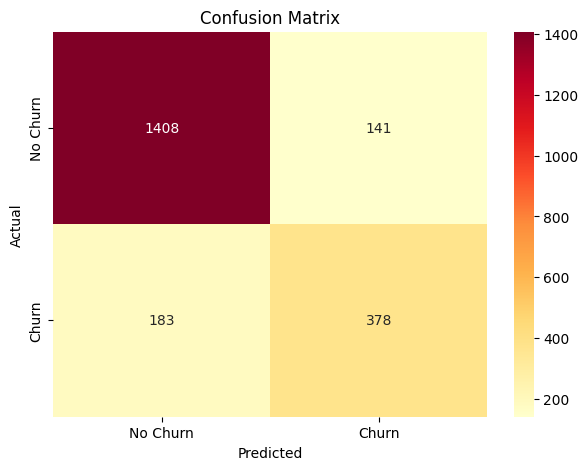

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Define features and target variable
X = churn_data.drop(columns = ['Churn'])
y = churn_data['Churn']

#Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter = 1000) #(max_iter=1000): số lần tối đa

#Train the model
logreg.fit(X_train, y_train)

#Make predictions
y_pred = logreg.predict(X_test)

#Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlOrRd', xticklabels = ['No Churn', 'Churn'], yticklabels = ['No Churn','Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6.2. Decision Tree

Decision Tree - Confusion Matrix:
[[1330  219]
 [ 192  369]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1549
           1       0.63      0.66      0.64       561

    accuracy                           0.81      2110
   macro avg       0.75      0.76      0.75      2110
weighted avg       0.81      0.81      0.81      2110



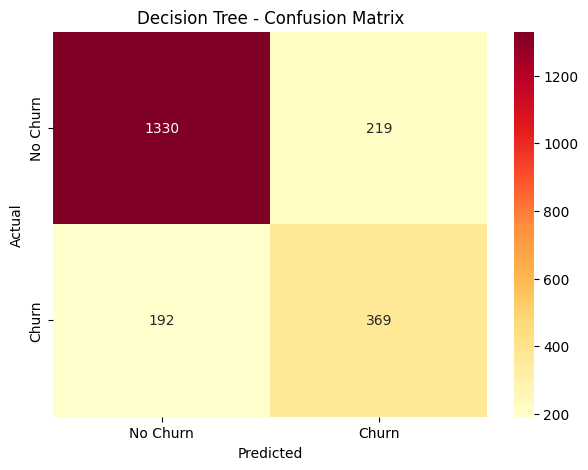

In [121]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

#Train the model
dtree.fit(X_train, y_train)

#Make predictions
y_pred_dtree = dtree.predict(X_test)

#Evaluate the model
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree))

#Compute the confusion matrix for Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

#Plot the confusion matrix for Decision Tree
plt.figure(figsize=(7, 5))
sns.heatmap(cm_dtree, annot = True, fmt = 'd', cmap = 'YlOrRd', xticklabels = ['No Churn', 'Churn'], yticklabels = ['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


### 6.3. Random Forest

Random Forest - Confusion Matrix:
[[1408  141]
 [ 184  377]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1549
           1       0.73      0.67      0.70       561

    accuracy                           0.85      2110
   macro avg       0.81      0.79      0.80      2110
weighted avg       0.84      0.85      0.84      2110



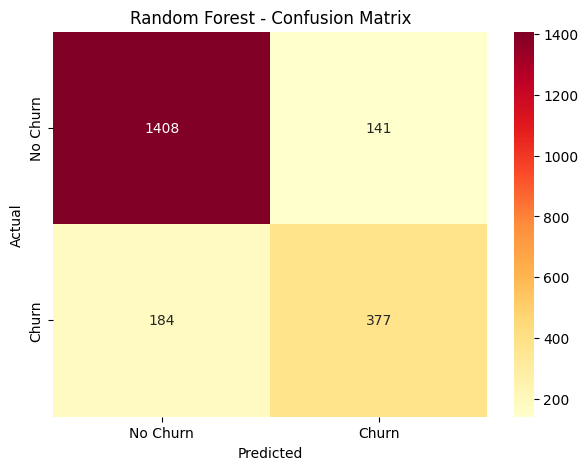

In [122]:
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Train the model
rf_classifier.fit(X_train, y_train)

#Make predictions
y_pred_rf = rf_classifier.predict(X_test)

#Evaluate the model
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

#Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

#Plot the confusion matrix for Random Forest
plt.figure(figsize = (7, 5))
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'YlOrRd', xticklabels = ['No Churn', 'Churn'], yticklabels = ['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

### 6.4. Support Vector Machines (SVM)

SVM - Confusion Matrix:
[[1409  140]
 [ 191  370]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1549
           1       0.73      0.66      0.69       561

    accuracy                           0.84      2110
   macro avg       0.80      0.78      0.79      2110
weighted avg       0.84      0.84      0.84      2110



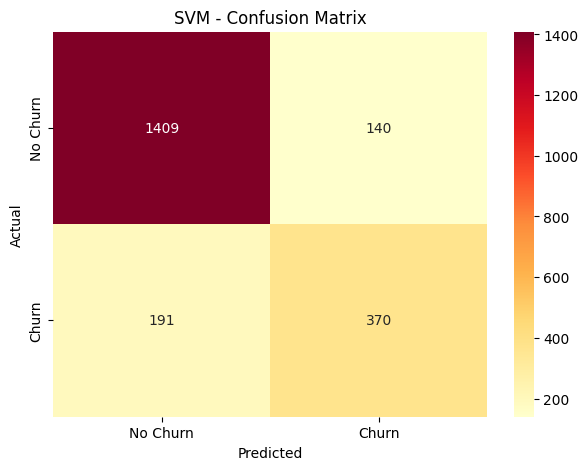

In [123]:
from sklearn.svm import SVC

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Initialize the SVM model
svm_model = SVC(kernel = 'linear', random_state = 42)

#Train the model
svm_model.fit(X_train, y_train)

#Make predictions
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

#Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

#Plot the confusion matrix for SVM
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'YlOrRd', xticklabels = ['No Churn', 'Churn'], yticklabels = ['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()


### 6.5. Model Evaluation

In [124]:
#Perform cross-validation to evaluate the performance of each model
from sklearn.model_selection import KFold, cross_val_score

#Define the models
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf_classifier,
    'SVM': svm_model
}

#Perform k-fold cross-validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42) #n_splits=5: 5-fold cross-validation

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy') # Example: using accuracy as metric
    print(f"{name} - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Logistic Regression - Cross-Validation Accuracy: 0.8599 (+/- 0.0152)
Decision Tree - Cross-Validation Accuracy: 0.8040 (+/- 0.0159)
Random Forest - Cross-Validation Accuracy: 0.8497 (+/- 0.0134)
SVM - Cross-Validation Accuracy: 0.8564 (+/- 0.0114)


*   Logistic Regression seems to be the most effective model, achieving the highest accuracy and correctly predicting the largest number of churns, with a total of 378.

# 7. Feature Importance Analysis

### 7.1. Feature Importance Analysis Based On Logistic Regression Model

<ipython-input-125-110455460f5c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df, palette="YlOrRd_r") # Use a named colormap or a list of colors


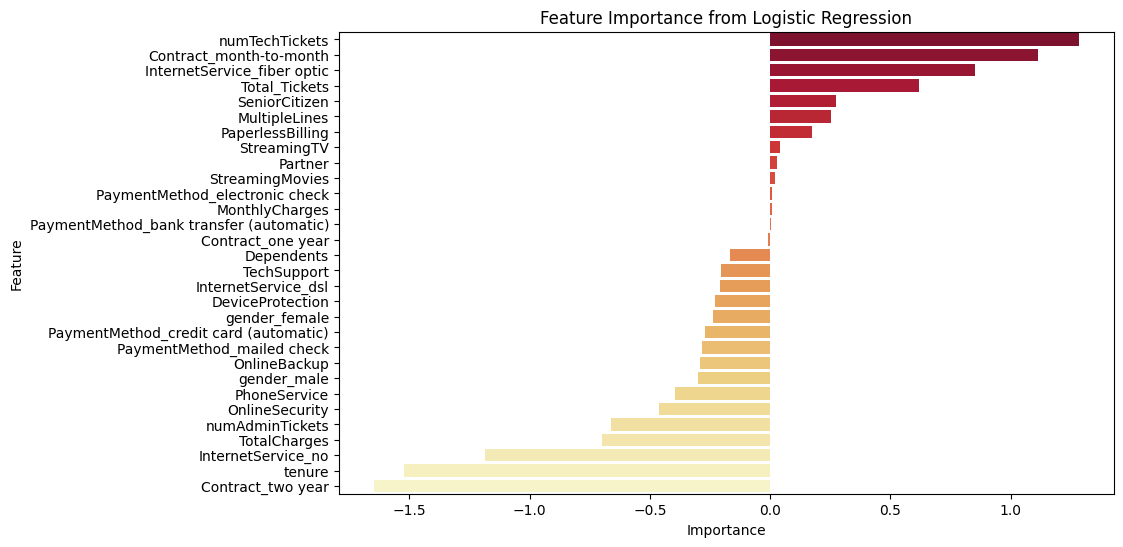

In [125]:
#Get feature importance from the Logistic Regression model
feature_importance = logreg.coef_[0]

#Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

#Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

#Plot the feature importance
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df, palette="YlOrRd_r") # Use a named colormap or a list of colors
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 7.2. Feature Importance Analysis Based On Decision Tree Model

<ipython-input-126-ab93981c81cc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance, palette="YlOrRd_r")


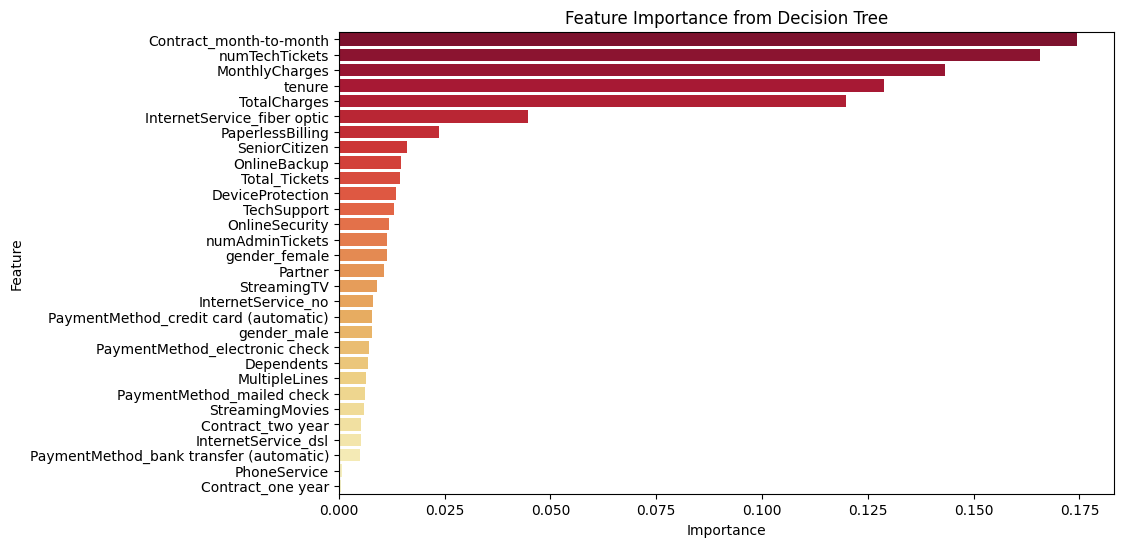

In [126]:
#Get the feature importance from the Decision Tree model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
})

#Sort the features by importance
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance, palette="YlOrRd_r")
plt.title('Feature Importance from Decision Tree')
plt.show()

### 7.3. Feature Importance Analysis Based On Random Forest Model

<ipython-input-127-1520334b2452>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="YlOrRd_r")


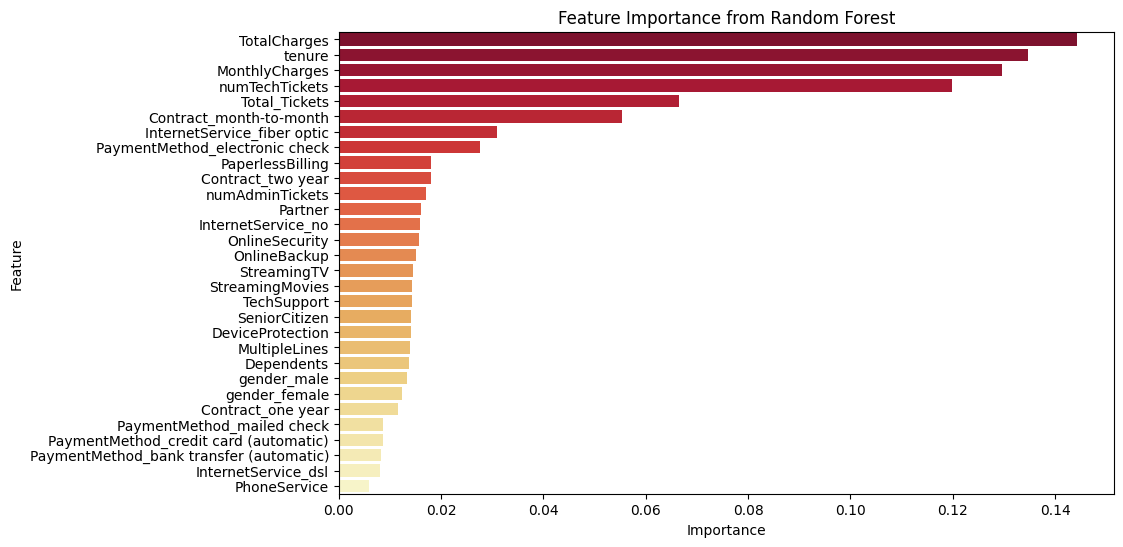

In [127]:
#Get the feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
})

#Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="YlOrRd_r")
plt.title('Feature Importance from Random Forest')
plt.show()


### 7.4. Feature Importance Analysis Based On SVM Model

<ipython-input-128-573b4f8d162a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="YlOrRd_r")


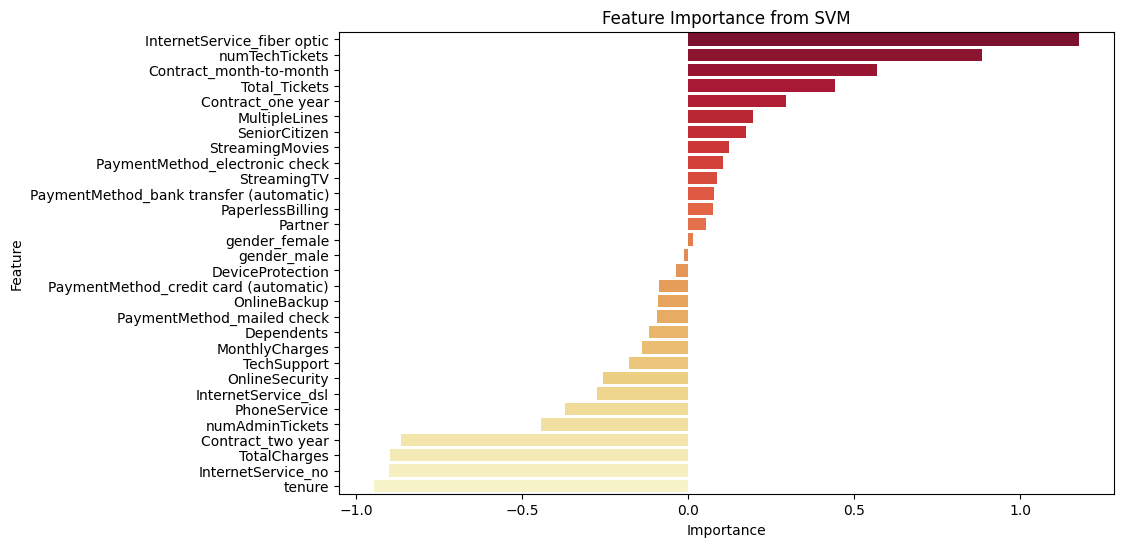

In [128]:
#Get the feature importance from the SVM model
feature_importance = svm_model.coef_[0]

#Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

#Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="YlOrRd_r")
plt.title('Feature Importance from SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




> The features that consistently appear at the top of most feature importance analyses are:
*   NumTechTickets
*   Contract_month-to-month
*   InternetService_fiber optic
*   Tenure

# 8. Insights and Recommendations

**Insights: From Feature Importance based on Logistic Regression model**

*   NumTechTickets (1.25) - A high volume of technical support tickets is closely linked churn, implying possible service problems or dissatisfaction.

*   Contract_month_to_month (1.15) - The most prominent predictor of churn, suggesting that customers with month-to-month contracts are at a higher risk of cancellation.

*   InternetService_fiber optic (0.85) - The presence of fiber optic internet service significantly influences the likelihood of churn.

*   Tenure (-1.5) - A shorter tenure is strongly associated with an increased probability of customer churn.

**Recommendations**

**1. Improve Technical Support and Service Quality**

**Issue**: A high number of technical support tickets is linked to churn, indicating service issues or dissatisfaction.

**Recommendation**: Invest in improving the quality of customer support and technical service. This could include:

*   Training customer service representatives for faster resolution times.

*   Implementing a more effective troubleshooting process to address common issues before they escalate.

*   Proactively reaching out to customers who are experiencing frequent technical issues to resolve them before they decide to churn.

*   Create a feedback system to gain insights into the causes of customer dissatisfaction. Conduct regular surveys to assess customer experiences, pinpoint areas of concern, and take action based on the feedback. Make it easy for customers to report problems and ensure their voices are heard.

**2. Offer Long-Term Contracts**

**Issue**: Customers with month-to-month contracts are at a higher risk of churn.

**Recommendation**: Encourage customers to switch to longer-term contracts by offering attractive incentives, such as discounts or added benefits for committing to longer terms (e.g., 1-year or 2-year contracts). This would help increase customer retention and reduce churn rates.

**3. Ensure Quality and Reliability of Fiber Optic Internet Service**

**Issue**: The presence of fiber optic internet service affects churn likelihood.

**Recommendation**: Invest in ensuring the quality and reliability of fiber optic services, as it significantly influences customer retention. If fiber optic is a premium service, emphasize its advantages in marketing materials, and offer targeted promotions to retain fiber optic customers by addressing any network or service issues proactively.

**4. Enhance Customer Engagement and Experience for New Customers**

**Issue**: Shorter tenure correlates with increased churn probability.

**Recommendation**: Focus on increasing engagement with new customers through:
*   Personalized onboarding experiences.
*   Regular follow-up to ensure customers are satisfied and fully utilizing their services.
*   Offering incentives or rewards for customers who stay for a longer period (e.g., free upgrades or service bundles after a certain number of months).